<a href="https://colab.research.google.com/github/andrespeedwork/analise-dados-boas-praticas/blob/main/MVP_Sprint_2_An%C3%A1lise_de_Dados_e_Boas_Pr%C3%A1ticas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##INTRODUÇÃO:

A expectativa de vida em um determinado país está bastante relacionada com a qualidade de vida que um indivíduo possui, já que fatores como educação, saúde, assistência social, segurança, guerras e conflitos internos influenciam-na diretamente. Este notebook busca abordar essas lacunas desenvolvendo um conjunto de dados abrangentes, sem análises de valores ausentes, utilizando dados de muitos anos de 193 países diferentes permitindo que os países priorizem atuações que poderiam melhorar mais efetivamente a saúde e a expectativa de vida de suas populações.
Com base acima entendi que o problema "Conjunto de dados de expectativa de vida dos países" seria um problema supervisionado uma vez que usam dados brutos com rótulos significativos e levei como premissa "A qualidade de vida está diretamente ligada a longevidade do indivíduo". Lembrando que os dados foram selecionados baseando-se nas consistências dos mesmos.

PREPARANDO O AMBIENTE PARA CRIAÇÃO DO MVP ANÁLISE DE DADOS E BOAS PRÁTICAS

# ATRIBUTOS DO DATASET:


Country: nome do país. Year: ano da análise. Status: status do país (variável binária). Life expectancy: expectativa média de vida. Adult mortality: probabilidade de morrer entre 15 e 60 anos por 1.000 habitantes. Infant deaths: mortes infantis por 1.000 bebês. Alcohol: consumo individual médio de álcool puro entre pessoas com mais de 15 anos. Percentage expenditure: porcentagem do PIB per capita gasto em assistência médica. Hepatitis B: cobertura de imunização contra hepatite B entre crianças de 1 ano em porcentagem. Measles: número relatado de casos de sarampo por 1.000 pessoas. BMI: IMC médio de toda a população. Under-five deaths: número de mortes de menores de cinco anos por 1.000 pessoas. Polio: cobertura de imunização contra pólio entre crianças de 1 ano em porcentagem. Total expenditure: despesa geral do governo com saúde como uma porcentagem da despesa total do governo. Diphtheria: cobertura de imunização contra difteria entre crianças de 1 ano em porcentagem. HIV/AIDS: mortes escalonadas por 1.000 nascidos vivos por HIV/AIDS. GDP: PIB de cada país em USD. Population: população total do país. Thinness 1-19 years: prevalência de magreza entre crianças e adolescentes de 10 a 19 anos em porcentagem. Thinness 5-9 years: prevalência de magreza entre crianças de 5 a 9 anos em porcentagem. Income composition of resources: índice de desenvolvimento humano (IDH) em termos de composição de renda dos recursos. Schooling: número médio de anos na escola.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
base_folder = '/content/drive/MyDrive/Sprint2/'

In [3]:
!ls '/content/drive/MyDrive/Sprint2/'

df_urso1.csv  urso.csv


In [4]:
# Biblioteca responsável por fazer a leitura e impressão da base de dados
import pandas as pd #Importando PANDAS e criando alias para facilitar na digitação
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns # para gerar gráficos mais atrativos com códigos mais limpos e mais simples.
from scipy.stats import pearsonr
import copy

In [5]:
#Realizando a importação do arquivo csv
# Ler o arquivo csv
df = pd.read_csv('/content/drive/MyDrive/Sprint2/urso.csv')

In [6]:
# Visualizando o arquivo
display(df.head(50))  # Print the first few rows of the DataFrame

,Name,age,gender,Date,Month,Year,Type,Location,Description,Type of bear,Hunter,Grizzly,Hikers,Only one killed,Latitude,Longitude
0,Mary Porterfield,3.0,female,19/05/1901,May,1901,Wild,"Job, West Virginia",The children were gathering flowers near their...,Black bear,0,0,0,0,38.864277,-79.556998
1,Wilie Porterfield,5.0,male,19/05/1901,May,1901,Wild,"Job, West Virginia",The children were gathering flowers near their...,Black bear,0,0,0,0,38.864277,-79.556998
2,Henry Porterfield,7.0,male,19/05/1901,May,1901,Wild,"Job, West Virginia",The children were gathering flowers near their...,Black bear,0,0,0,0,38.864277,-79.556998
3,John Dicht,18.0,male,24/11/1906,Nov,1906,Wild,"Elk County, Pennsylvania","Thinking the bear was dead, Dicht began skinni...",Black bear,0,0,0,1,41.437362,-78.626009
4,Baby Laird,1.0,NaN,05/10/1908,Oct,1908,Captive,"Tucson, Arizona",After a bear escaped from a cage at Elysian Gr...,Black bear,0,0,0,1,32.222876,-110.974847
5,Frank Welch,61.0,male,08/09/1916,Sep,1916,Wild,"Yellowstone National Park, Wyoming",Welch was killed at a camp near Sylvan Pass wh...,Brown bear,0,0,0,1,44.620089,-110.560689
6,"Joseph B. ""Frenchy"" Duret",60.0,male,12/06/1922,Jun,1922,Wild,"Absaroka-Beartooth Wilderness, Montana",Duret was attacked and partially devoured by a...,Brown bear,0,1,0,1,45.269612,-109.968024
7,Olga Gregorchuk,9.0,female,29/08/1929,Aug,1929,Wild,"near Lac Du Bonnet, Manitoba",Gregorchuk was minding her four-year-old broth...,Black bear,0,0,0,1,NaN,NaN
8,Percy Goodair,52.0,male,12/09/1929,Sep,1929,Wild,"Jasper National Park, Alberta","Goodair, a Parks Canada warden, was killed by ...",Brown bear,0,0,0,1,52.804103,-117.804827
9,Jack Thayer,NaN,male,16/10/1929,Oct,1929,Wild,"Admiralty Island, Alaska","Thayer, a U.S. Forest Service employee, and Fr...",Brown bear,0,0,0,1,57.713324,-134.409838


In [7]:
df_urso = df.copy()
df_urso.drop( columns = ['Name','Type of bear', 'gender', 'Date', 'Description','Latitude','Longitude'],inplace=True)

Text(0.5, 1.0, 'Histograma de URSO')

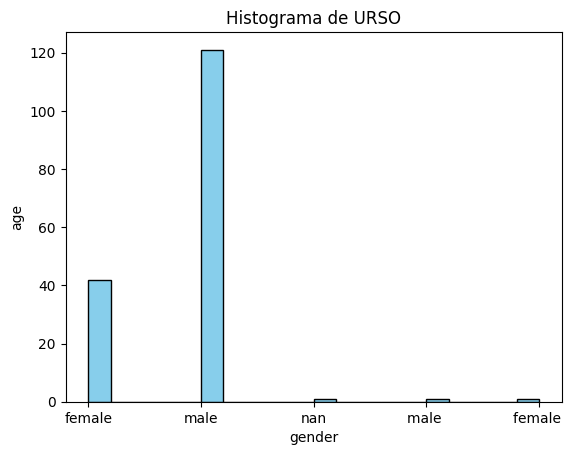

In [8]:
# Criando o histograma URSO
#Convert a coluna 'logradouro' para o tipo string antes de criar o histograma
plt.hist(df['gender'].astype(str), bins=20, color='skyblue', edgecolor='black')

# Adicionando rótulos e título
plt.xlabel('gender')
plt.ylabel('age') # Rótulo alterado para refletir que o histograma está mostrando valor
plt.title('Histograma de URSO')

##ANALISE DE DADOS

Nesta etapa a ideia é entender a informação que está disponível levando-se em conta algumas estatísticas descritivas para uma possível necessidade de transformação na etapa de preparação de dados. Abaixo foram dispostos alguns comandos bem como suas finalidades.

In [9]:
#Informa a quantidade de atributos e instâncias existentes
print(df_urso.shape)

(166, 9)


In [10]:
# Informa quais são os tipos de dados dos atributos
print(df_urso.dtypes)

 age               float64
Month               object
Year                 int64
Type                object
Location            object
Hunter               int64
Grizzly              int64
Hikers               int64
Only one killed      int64
dtype: object


In [11]:
# Verifica as primeiras linhas do dataset e não foram encontradas inconsistências
df_urso.describe()

,age,Year,Hunter,Grizzly,Hikers,Only one killed
count,164.000000,166.000000,166.000000,166.000000,166.000000,166.000000
mean,36.117378,1981.313253,0.096386,0.162651,0.036145,0.831325
std,20.379920,28.868323,0.296012,0.370163,0.187215,0.375597
min,0.416667,1901.000000,0.000000,0.000000,0.000000,0.000000
25%,19.750000,1967.000000,0.000000,0.000000,0.000000,1.000000
50%,36.500000,1987.000000,0.000000,0.000000,0.000000,1.000000
75%,51.250000,2005.000000,0.000000,0.000000,0.000000,1.000000
max,93.000000,2018.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
# Verifica se há valores faltantes, discrepantes e/ou inconsistentes
missing_values = df_urso.isnull().sum()
print("Valores faltantes por coluna:")
print(missing_values)

Valores faltantes por coluna:
 age               2
Month              0
Year               0
Type               0
Location           0
Hunter             0
Grizzly            0
Hikers             0
Only one killed    0
dtype: int64


In [13]:
# Resumo estatístico dos atributos com valor numérico (mínimo, máximo, mediana, moda, média, desvio-padrão e número de valores ausentes).
# Filtrar apenas as colunas numéricas
numeric_df = df.select_dtypes(include=['float64', 'int64'])


In [14]:
print(df_urso.dtypes)

 age               float64
Month               object
Year                 int64
Type                object
Location            object
Hunter               int64
Grizzly              int64
Hikers               int64
Only one killed      int64
dtype: object


In [15]:
# Resumo estatístico básico (média, desvio-padrão, mínimo, máximo, etc.)
stats_summary = numeric_df.describe()

In [16]:
# Cálculo da mediana para cada coluna numérica
median_values = numeric_df.median()

In [17]:
# Cálculo da moda para cada coluna numérica
mode_values = numeric_df.mode().iloc[0]

In [18]:
# Contagem de valores ausentes
missing_values = numeric_df.isnull().sum()

In [19]:
# Exibir o resumo completo
print("Resumo Estatístico:")
print(stats_summary)
print("\nMedianas:")
print(median_values)
print("\nModas:")
print(mode_values)
print("\nNúmero de valores ausentes por coluna:")
print(missing_values)

Resumo Estatístico:
              age         Year      Hunter     Grizzly      Hikers  \
count  164.000000   166.000000  166.000000  166.000000  166.000000   
mean    36.117378  1981.313253    0.096386    0.162651    0.036145   
std     20.379920    28.868323    0.296012    0.370163    0.187215   
min      0.416667  1901.000000    0.000000    0.000000    0.000000   
25%     19.750000  1967.000000    0.000000    0.000000    0.000000   
50%     36.500000  1987.000000    0.000000    0.000000    0.000000   
75%     51.250000  2005.000000    0.000000    0.000000    0.000000   
max     93.000000  2018.000000    1.000000    1.000000    1.000000   

       Only one killed    Latitude   Longitude  
count       166.000000  120.000000  120.000000  
mean          0.831325   48.796409 -110.433113  
std           0.375597    9.294266   24.480565  
min           0.000000   30.785744 -163.007648  
25%           1.000000   41.839680 -123.969594  
50%           1.000000   46.318989 -110.980410  
75%   

##PRÉ-PROCESSAMENTO DE DADOS
Nesta etapa a ideia é realizar operações de limpeza, tratamento e preparação dos dados. Como o dataset dispõe da coluna categórica "Country", que não pode ser usada diretamente pelo modelo, optei por usar a operação "one-hot encoding" para transformar a categoria em formato numérico.

In [20]:
# Usando a operação "one-hot encoding" na coluna "gender".
encoded_df = pd.get_dummies(df, columns=['gender'])

In [21]:
# Exibir as primeiras linhas do dataset com as colunas one-hot encoded
print(encoded_df.head())

                Name   age        Date Month  Year     Type  \
0   Mary Porterfield   3.0  19/05/1901   May  1901     Wild   
1  Wilie Porterfield   5.0  19/05/1901   May  1901     Wild   
2  Henry Porterfield   7.0  19/05/1901   May  1901     Wild   
3         John Dicht  18.0  24/11/1906   Nov  1906     Wild   
4         Baby Laird   1.0  05/10/1908   Oct  1908  Captive   

                   Location  \
0        Job, West Virginia   
1        Job, West Virginia   
2        Job, West Virginia   
3  Elk County, Pennsylvania   
4           Tucson, Arizona   

                                         Description Type of bear  Hunter  \
0  The children were gathering flowers near their...   Black bear       0   
1  The children were gathering flowers near their...   Black bear       0   
2  The children were gathering flowers near their...   Black bear       0   
3  Thinking the bear was dead, Dicht began skinni...   Black bear       0   
4  After a bear escaped from a cage at Elysian Gr

In [22]:
# Salvar em CSV
df_urso.to_csv('df_urso1.csv', index=False)


In [24]:
# Tratando/Limpando e padronizando os dados

X = pd.read_csv('/content/drive/MyDrive/Sprint2/df_urso1.csv')

print(X.shape)
print(X.head())

type_col = X[['Type']]
X.drop(['Type'], axis=1, inplace = True)

# OBS: Os dados se mostraram limpos e foram padronizados

(166, 9)
    age Month  Year     Type                  Location  Hunter  Grizzly  \
0   3.0   May  1901     Wild        Job, West Virginia       0        0   
1   5.0   May  1901     Wild        Job, West Virginia       0        0   
2   7.0   May  1901     Wild        Job, West Virginia       0        0   
3  18.0   Nov  1906     Wild  Elk County, Pennsylvania       0        0   
4   1.0   Oct  1908  Captive           Tucson, Arizona       0        0   

   Hikers  Only one killed  
0       0                0  
1       0                0  
2       0                0  
3       0                1  
4       0                1  


**Análise Exploratória de Dados**

In [25]:
# Calculate the most frequent value (mode) of the 'gender' column
mode_age = df['gender'].mode()[0]

# Fill missing values in the 'Age' column with the mode
df['age'] = df['gender'].fillna(mode_age)

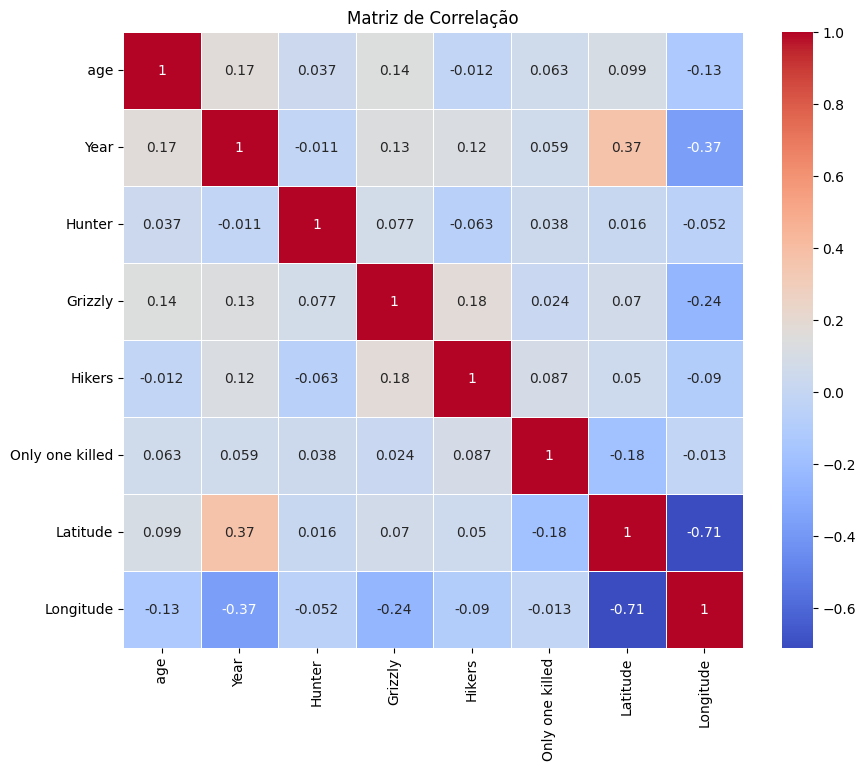

In [26]:
# Assuming df is your DataFrame
df = pd.read_csv('/content/drive/MyDrive/Sprint2/urso.csv') # Replace with your actual file path

# Select only numerical columns for correlation analysis
numerical_df = df.select_dtypes(include=['number'])

# Calculate the correlation matrix
corr_matrix = numerical_df.corr()

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlação')
plt.show()

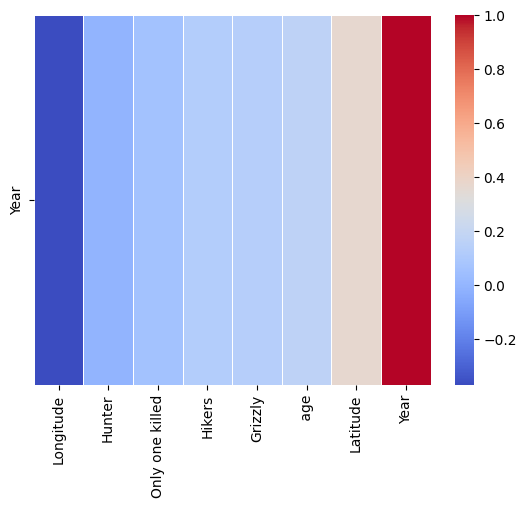

In [27]:
sns.heatmap(corr_matrix[['Year']].sort_values(by='Year').T, annot=False, cmap='coolwarm', linewidths=0.5)
plt.show()

In [28]:
print(corr_matrix[['Year']].sort_values(by='Year'))

                     Year
Longitude       -0.369668
Hunter          -0.010647
Only one killed  0.059121
Hikers           0.123488
Grizzly          0.133589
 age             0.169412
Latitude         0.365491
Year             1.000000


In [30]:
# Criando Diagrama de dispersão de álcool e expectativa de vida
urso = pd.read_csv('/content/drive/MyDrive/Sprint2/df_urso1.csv')

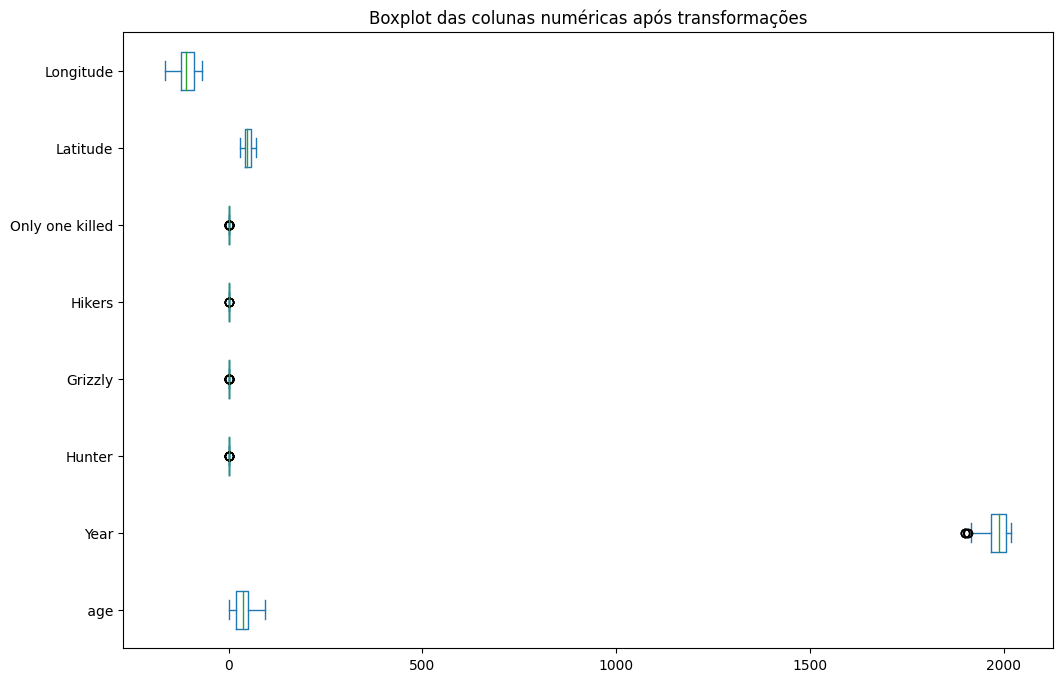

In [ ]:
# Gerar boxplot novamente para verificar outliers
df[numeric_df.columns].plot(kind='box', figsize=(12, 8), vert=False)
plt.title("Boxplot das colunas numéricas após transformações")
plt.show()

##AUTOAVALIAÇÃO

Neste MVP deparei com algumas situações que até então nem se quer imaginava que teria e vou tentar contextualizar abaixo bem como algumas dores operacionais que tive.

1- Da definição do problema - tive muita dificuldade para encontrar o dataset correto pois, como estou iniciando, ainda tenho dificuldade para contar uma história com os meus dados e por isso perdi muito mais tempo coletando do que analisando os mesmos.

2- Uma vez com algumas perguntas elencadas fui buscar uma base de dados confiável e segura e optei por seguir a indicação do curso.

3- Baixei o arquivo csv localmente e depois subi para o notebook de forma manual.

4- Por fim, consegui determinar que existe sim a correlação entre consumo de álcool e a expectativa de vida e isso se deve ao fato de que países mais desenvolvidos tendem a consumir mais álcool. Em função disso alguns países tem adotado a Lei Seca para minimizar os danos causados à sociedadde pela ingestão exessiva de álcool.

##REFERÊNCIAS:
Este conjunto de dados mostra todos os registros de mortes de ursos pretos, pardos ou polares entre 1900 e os dias atuais na América do Norte.

Referências
Bear Attacks North America. Kaggle, 2021. Disponível em: https://www.kaggle.com/datasets/stealthtechnologies/bear-attacks-north-america/data. Acesso em: 16/09/2024.


Introdução à Ciência de Dados (Data Science): Didática Tech. Youtube, 2022. Disponível em: https://www.youtube.com/watch?v=sjpBNi4DgI0. Acesso em: 06/09/2024

Como criar um projeto de Data Science do zero para seu Portfólio | Hipsters: Portfólio Dev. Youtube, 2024. Disponível em: https://www.youtube.com/watch?v=hV3ORe7F8Q4. Acesso em: 09/09/2024

Cleaned Countries Life Expectancy Dataset. Kaggle, 2021. Disponível em: https://www.kaggle.com/datasets/paperxd/cleaned-life-expectancy-dataset/data. Acesso em: 16/09/2024.